# Covid-19 Visualization
using **Kaggle** Corona open Dataset ...
### Updates
###### Update 1:
- Importing and Cleaning Kaggle Covid-19 Dataset.
- Setting the **X-axis** to datetime scale , **Y-axis** to the desired country to be analyzed.
- Adding ncases, ndeaths, nrecover columns to the dataset to indicate the NEW [cases, deaths, recover] per Day.

###### Update 1.1:
- Added Bar Plot to visualize the Average Cases-Deaths/week for each country. "As an indication of Peaking"

###### Update 2:
- Added countries_comp list, to compare between countries.

---

### Limitations
1) Province/State [Not Working]

2) Countries that is updated according to the Province/States [Not Working]

---

**Shady El Hawary**

In [1]:
import pandas as pd
import numpy as nps
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import date2num
import seaborn as sns
import math
import datetime
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
pd.options.display.max_rows = None
pd.options.display.max_columns = None

<Figure size 1440x1280 with 0 Axes>

In [2]:
countries = ['Egypt']
countries_comp = ['Egypt', 'Saudi Arabia', 'Qatar', 'Iraq']

In [3]:
data = pd.read_csv("covid_19_data.csv", index_col=[0])
data.rename(columns={'SNo': 'index', 'ObservationDate': 'ObsDate', 'Province/State': 'city', 'Country/Region': 'country', 'Last Update': 'update', 'Confirmed': 'cases', 'Deaths': 'deaths', 'Recovered':'recovered'}, inplace=True)
data.cases = data.cases.astype(int)
data.deaths = data.deaths.astype(int)
data.recovered = data.recovered.astype(int)
country = data.country.unique()
egypt = data[data.country == 'Egypt']
# countries = ['Saudi Arabia']
new_data = data[data.country.isin(countries)]
new_data = new_data.reset_index(drop=True)
new_data['ncases'] = new_data.cases.diff().fillna(0)
new_data['ndeaths'] = new_data.deaths.diff().fillna(0)
new_data['nrecover'] = new_data.recovered.diff().fillna(0)
new_data['date'] = new_data['ObsDate']
dates = new_data['date'].tolist()
x_value = [datetime.datetime.strptime(d, "%m/%d/%Y").date() for d in dates]  # DATE TIME
new_data.reset_index()

avr_ncases_week = []
avr_ndeaths_week = []
weeks = int(len(dates)/6)
wk=0
for i in range(weeks+1):
    nwk = wk + 6
    avr_ncases_week.append(new_data.ncases.iloc[wk:nwk].mean())
    avr_ndeaths_week.append(new_data.ndeaths.iloc[wk:nwk].mean())    
    wk = nwk


print('Last UpDate: {} - Country: {} ... Cases: {} ... Max Difference in Cases:{} .... AT:{}'.format(max(x_value),
                                                                                                      countries[0],
                                                                                                      max(new_data['cases']),
                                                                                                      max(new_data['ncases']),
                                                                                                        x_value[new_data['ncases'].idxmax(skipna=True)]))

print('Last UpDate: {} - Country: {} ... Deaths: {} ... Max Difference in Deaths:{} .... AT:{}'.format(max(x_value),
                                                                                                      countries[0],
                                                                                                      max(new_data['deaths']),
                                                                                                      max(new_data['ndeaths']),
                                                                                                        x_value[new_data['ndeaths'].idxmax(skipna=True)]))

Last UpDate: 2020-05-30 - Country: Egypt ... Cases: 23449 ... Max Difference in Cases:1367.0 .... AT:2020-05-30
Last UpDate: 2020-05-30 - Country: Egypt ... Deaths: 913 ... Max Difference in Deaths:34.0 .... AT:2020-05-29


Text(0.5, 1.0, 'Egypt - Deaths')

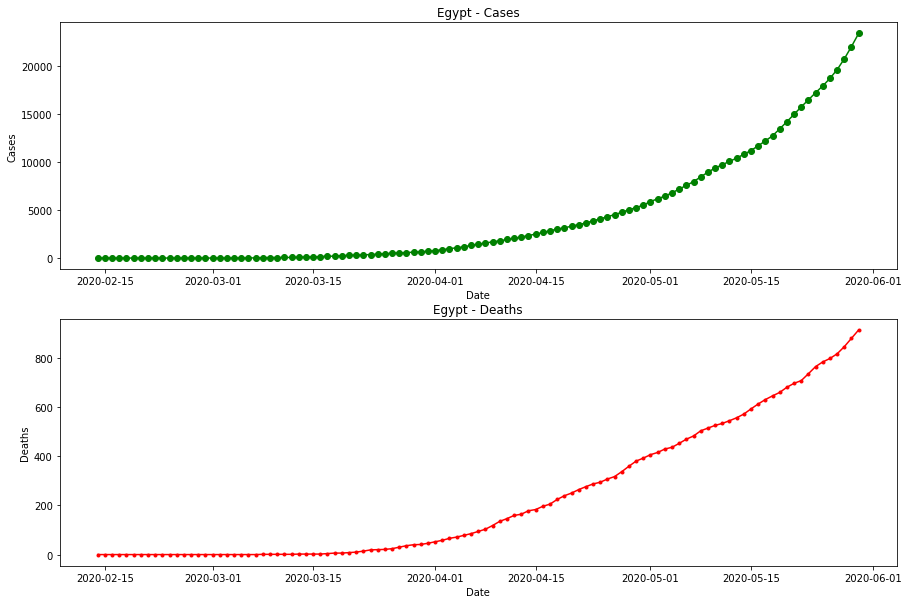

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(x_value, new_data['cases'], marker='o', color='g')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('{} - Cases'.format(countries[0]))
plt.subplot(2,1,2)
plt.plot(x_value, new_data['deaths'], marker='.', color='r')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('{} - Deaths'.format(countries[0]))

Text(0.5, 1.0, 'Egypt - New Deaths')

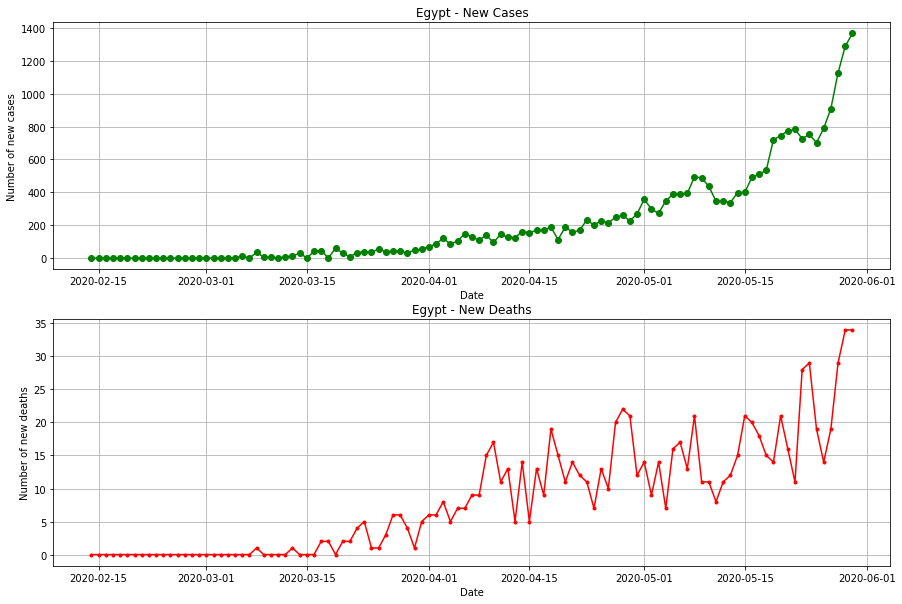

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(x_value, new_data['ncases'], marker='o', color='g')
plt.xlabel('Date')
plt.ylabel('Number of new cases')
plt.grid()
plt.title('{} - New Cases'.format(countries[0]))
plt.subplot(2,1,2)
plt.plot(x_value, new_data['ndeaths'], marker='.', color='r')
plt.xlabel('Date')
plt.ylabel('Number of new deaths')
plt.grid()
plt.title('{} - New Deaths'.format(countries[0]))

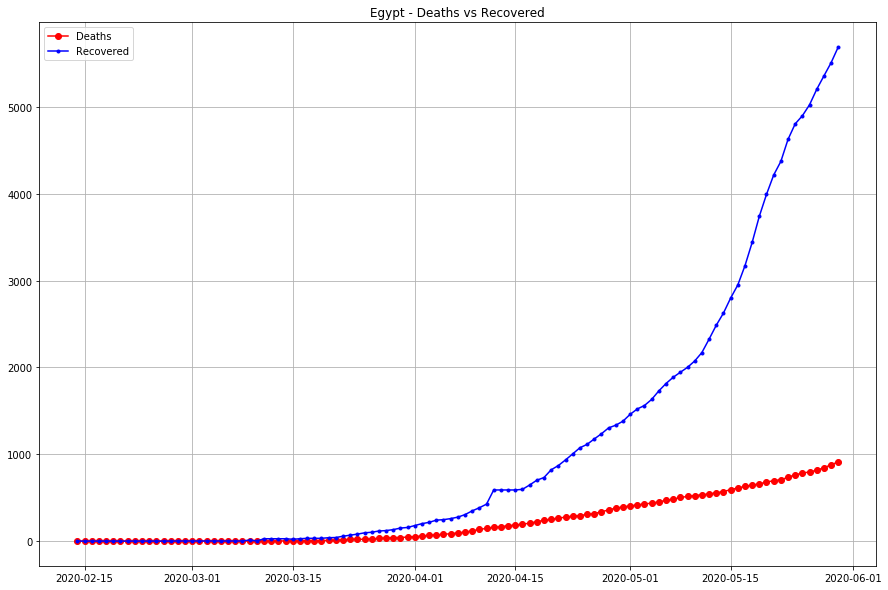

In [6]:
plt.figure(figsize=(15,10))
plt.plot(x_value, new_data['deaths'], marker='o', color='r', label='Deaths')
plt.plot(x_value, new_data['recovered'], marker='.', color='b', label='Recovered')
plt.title('{} - Deaths vs Recovered'.format(countries[0]))
plt.grid()
plt.legend()
plt.show()

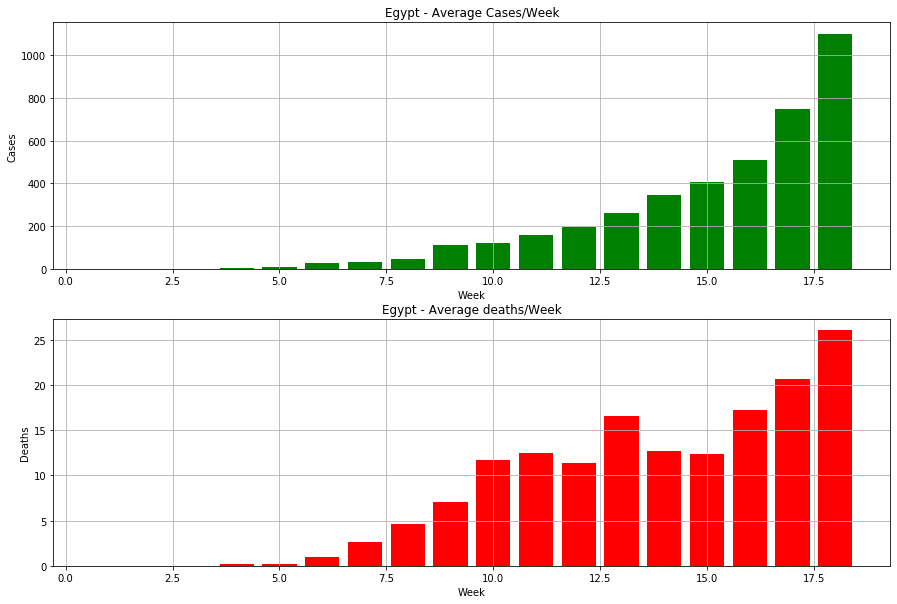

In [7]:
plt.figure(figsize=(15,10))
weeks = pd.Series(range(1,len(avr_ncases_week)+1))
ax = plt.subplot(2,1,1)
ax.bar(weeks, avr_ncases_week, color='g')
plt.title('{} - Average Cases/Week'.format(countries[0]))
plt.xlabel('Week')
plt.ylabel('Cases')
plt.grid()
ax = plt.subplot(2,1,2)
ax.bar(weeks, avr_ndeaths_week, color='r')
plt.title('{} - Average deaths/Week'.format(countries[0]))
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.grid()
plt.show()

In [8]:
##COMPARING SECTION

D:\Programs\Anacoda\Install\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106]),
 <a list of 107 Text xticklabel objects>)

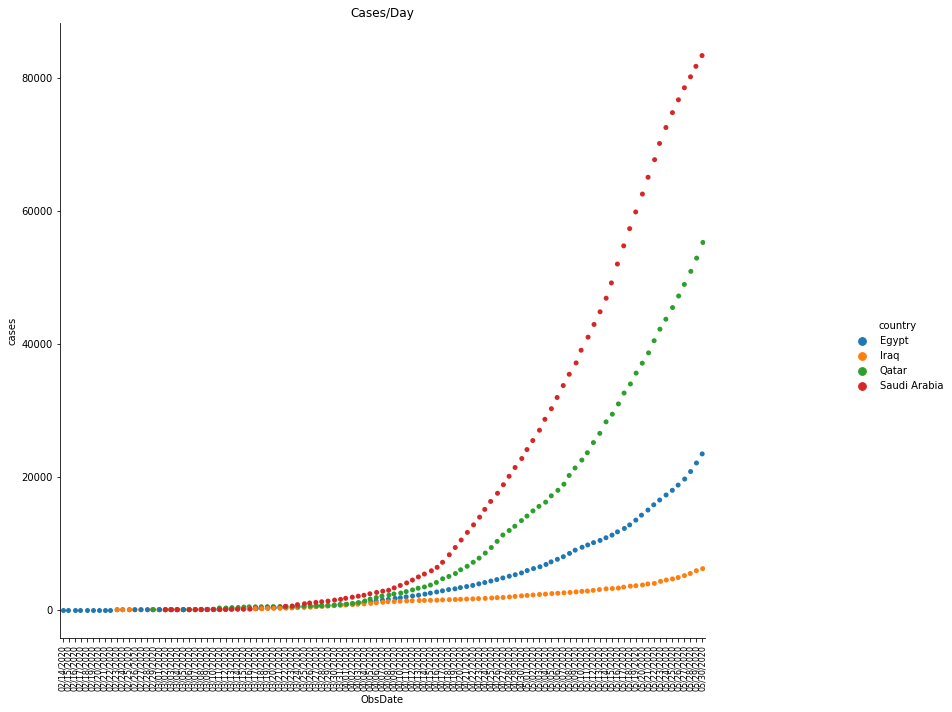

In [9]:
fig_size = (20, 15)
# countries_comp = ['Saudi Arabia', 'Egypt', 'Qatar']
diff_comp_c = []
diff_comp_d = []
x_value_comp = []
for i in range(0, len(countries_comp)):
    dates = data['ObsDate'][data.country == countries_comp[i]].tolist()
    x_value_comp.append([datetime.datetime.strptime(d, "%m/%d/%Y").date() for d in dates])  # DATE TIME
com_data = data[data.country.isin(countries_comp)]
# dates = com_data['ObsDate'].tolist()
# x_value = [datetime.datetime.strptime(d, "%m/%d/%Y").date() for d in dates]  # DATE TIME
# x_value = list(dict.fromkeys(x_value))
# com_data['x_value'] = x_value
for i in range(0, len(countries_comp)):
    diff_comp_c.append(com_data[com_data.country == countries_comp[i]].cases.diff().fillna(0))
    diff_comp_d.append(com_data[com_data.country == countries_comp[i]].deaths.diff().fillna(0))
g = sns.catplot(x="ObsDate", y="cases", hue='country', ax=fig_size, data=com_data)
g.fig.set_size_inches(15,10)
plt.title('Cases/Day')
plt.xticks(rotation=90,size=8)
# new_data1 = data[data.country == countries_comp[0]]
# new_data2 = data[data.country == countries_comp[1]]
# new_data1
# new_data2

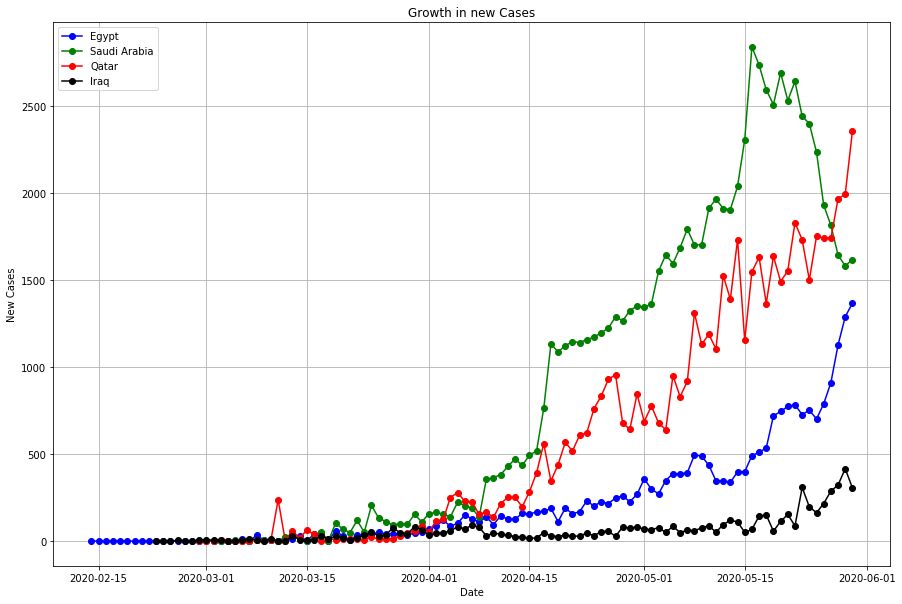

In [10]:
plt.figure(figsize=(15,10))
colors = ['b', 'g' ,'r', 'k', 'y', 'm']
for i in range(0, len(countries_comp)):
  plt.plot(x_value_comp[i], diff_comp_c[i], marker='o', color=colors[i], label=countries_comp[i])  
# plt.plot(x_value_comp[0], diff_comp[0], marker='o', color='b', label=countries_comp[0])
# plt.plot(x_value_comp[1], diff_comp[1], marker='o', color='g', label=countries_comp[1])
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.title('Growth in new Cases')
plt.grid()
plt.show()

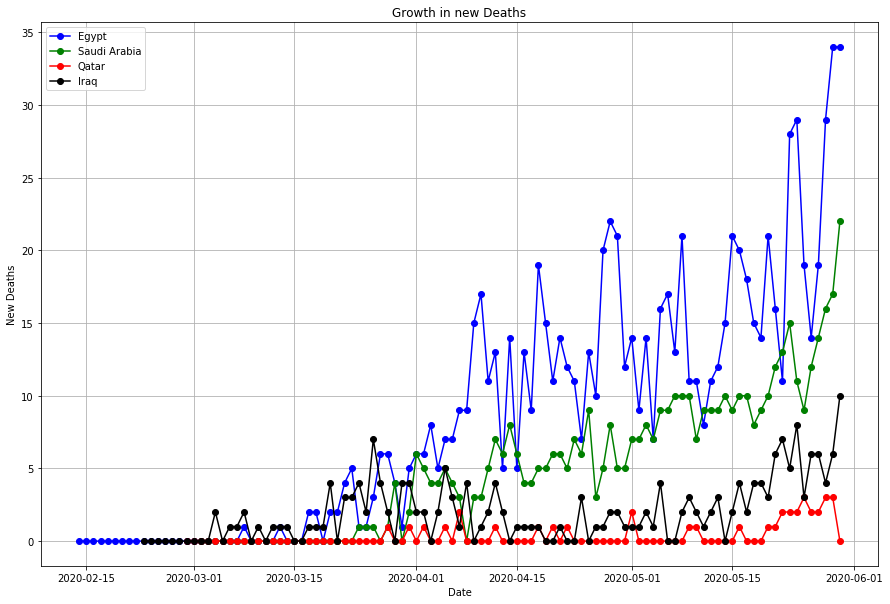

In [11]:
plt.figure(figsize=(15,10))
colors = ['b', 'g' ,'r', 'k', 'y', 'm']
for i in range(0, len(countries_comp)):
  plt.plot(x_value_comp[i], diff_comp_d[i], marker='o', color=colors[i], label=countries_comp[i])  
# plt.plot(x_value_comp[0], diff_comp[0], marker='o', color='b', label=countries_comp[0])
# plt.plot(x_value_comp[1], diff_comp[1], marker='o', color='g', label=countries_comp[1])
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.title('Growth in new Deaths')
plt.grid()
plt.show()

D:\Programs\Anacoda\Install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Programs\Anacoda\Install\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


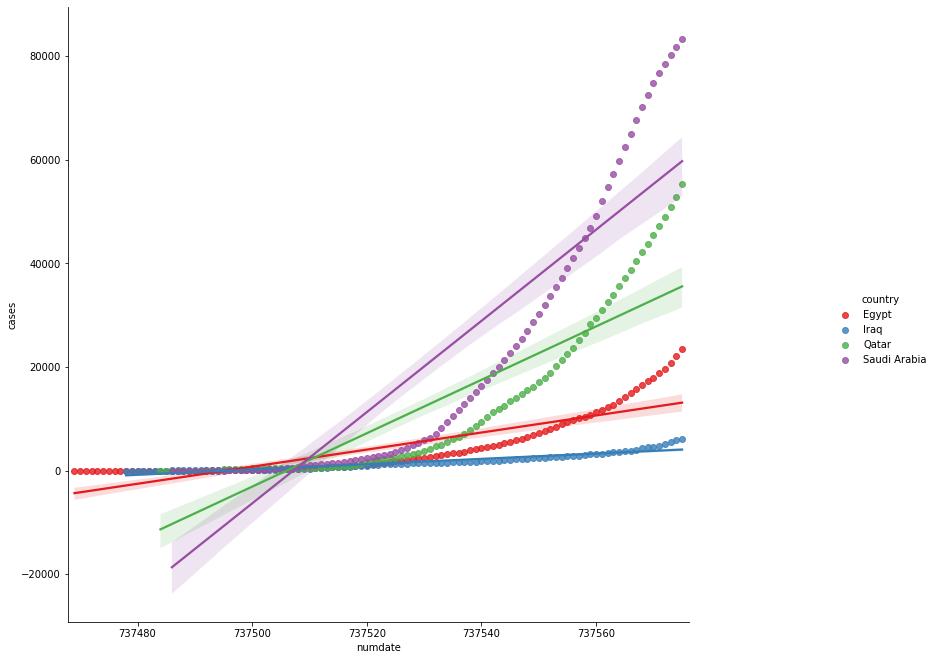

In [12]:
fig_size = (20, 15)
com_data['ObsDate'] = pd.to_datetime(com_data['ObsDate'])
com_data['numdate'] = date2num(com_data['ObsDate'])
g2 = sns.lmplot(x='numdate', y='cases', hue='country', data=com_data, palette="Set1")
g2.fig.set_size_inches(15,10)

D:\Programs\Anacoda\Install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Programs\Anacoda\Install\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


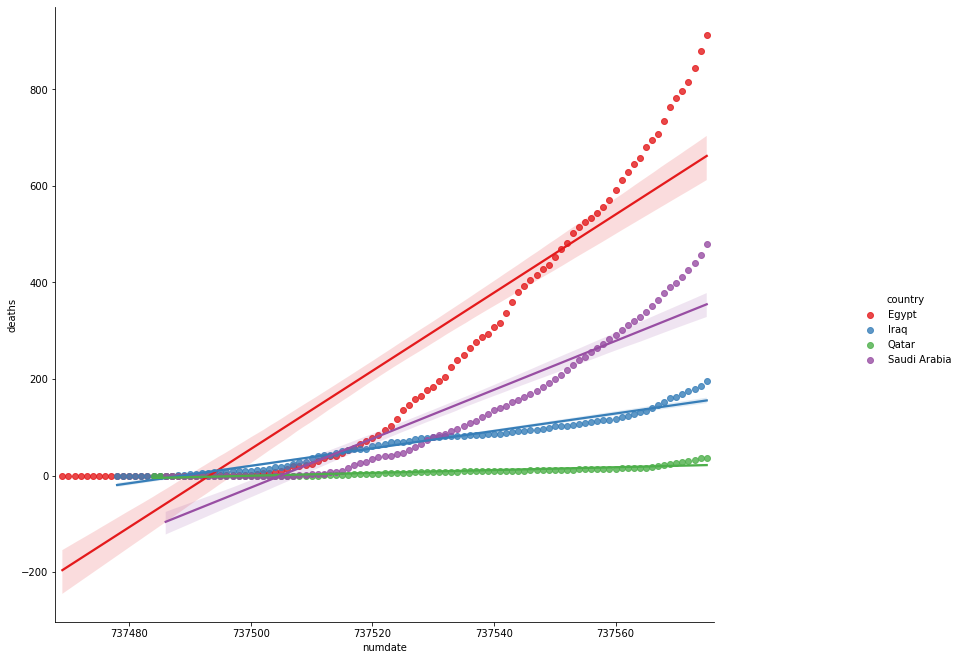

In [13]:
fig_size = (20, 15)
com_data['ObsDate'] = pd.to_datetime(com_data['ObsDate'])
com_data['numdate'] = date2num(com_data['ObsDate'])
g2 = sns.lmplot(x='numdate', y='deaths', hue='country', data=com_data, palette="Set1")
g2.fig.set_size_inches(15,10)